<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/WEATHER_PREDICTION_WITH_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
Weather_data = pd.read_csv("/content/seattle-weather (1).csv")

In [ ]:
Weather_data.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
1066,2014-12-02,0.0,5.6,-3.2,5.7,fog
929,2014-07-18,0.0,23.9,11.7,2.8,sun
527,2013-06-11,0.0,20.0,10.0,5.7,sun
718,2013-12-19,0.0,5.0,0.0,2.1,sun
310,2012-11-06,0.3,12.8,6.7,3.5,rain


In [ ]:
Weather_data.shape

(1461, 6)

In [ ]:
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
Weather_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
print(Weather_data['weather'].value_counts()/len(Weather_data)*100)
print(Weather_data['weather'].unique())

rain       43.874059
sun        43.805613
fog         6.913073
drizzle     3.627652
snow        1.779603
Name: weather, dtype: float64
['drizzle' 'rain' 'sun' 'snow' 'fog']


In [ ]:
encoder = LabelEncoder()

In [ ]:
Weather_data['weather_label'] = encoder.fit_transform(Weather_data['weather'])
Weather_data.head(5)
#Weather_data.replace({'weather' : {'rain' : 0, 'sun': 1, 'fog' : 2, 'drizzle' : 3, 'snow' : 4}}, inplace = True)

,date,precipitation,temp_max,temp_min,wind,weather,weather_label
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


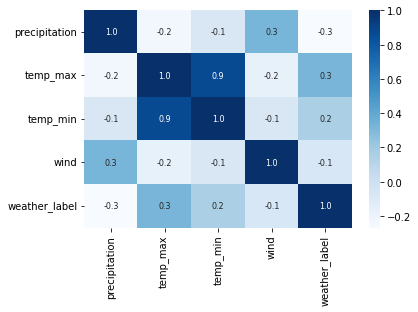

In [ ]:
corr = Weather_data.corr()
sns.heatmap(corr, cbar = True, cmap = 'Blues', fmt = '.1f', annot = True, annot_kws= {'size' : 8})

In [ ]:
weather_dict = dict(zip(Weather_data['weather'], Weather_data['weather_label']))
weather_dict

{'drizzle': 0, 'rain': 2, 'sun': 4, 'snow': 3, 'fog': 1}

In [ ]:
def date_time(df):

  Weather_data['date'] = pd.to_datetime(Weather_data['date'])
  Weather_data['year'] = Weather_data['date'].dt.year
  Weather_data['month'] = Weather_data['date'].dt.month
  Weather_data['day'] = Weather_data['date'].dt.day

  return(df)

df_final = date_time(Weather_data)
df_final.head()

,date,precipitation,temp_max,temp_min,wind,weather,weather_label,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2,2012,1,5


In [ ]:
df_final = Weather_data.drop(columns = ['weather'], axis = 1).set_index('date')
#df_final = Weather_data.set_index('date')
df_final.head()

,precipitation,temp_max,temp_min,wind,weather_label,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,2,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,2,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,2,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,2,2012,1,5


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather_label  1461 non-null   int64  
 5   year           1461 non-null   int64  
 6   month          1461 non-null   int64  
 7   day            1461 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 102.7 KB


In [ ]:
x = df_final.drop(['weather_label'], axis = 1)
y = df_final['weather_label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [ ]:
model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB()

In [ ]:
def Model_Evaluation(estimator, features, label):
  prediction = estimator.predict(features)

  print(f'accuracy_score : {accuracy_score(prediction, label)}')
  print(f"recall_score : {recall_score(prediction, label, average = 'weighted')}")
  print(f"f1_score : {f1_score(prediction, label, average = 'weighted')}")


In [ ]:
Model_Evaluation(model, x_test, y_test)

accuracy_score : 0.8600682593856656
recall_score : 0.8600682593856656
f1_score : 0.8661210435151411


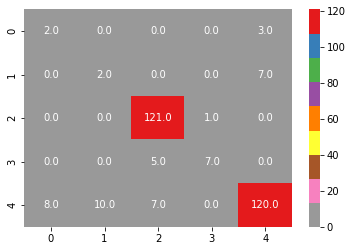

In [ ]:
cmt = confusion_matrix(model.predict(x_test), y_test)
axl = sns.heatmap(cmt, cmap = 'Set1_r',annot = True, fmt ='.1f')
axl